In [61]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Load Dataset

In [62]:
data = load_iris()
#convert to a dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
df['Species'] = data.target

In [64]:
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

In [65]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Splitting a dataset for the classifier

In [66]:
x = df.drop(columns="Species")
y = df["Species"]
feature_names = x.columns
labels = y.unique()
X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.3,random_state = 42)

## Training the classifier

In [67]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Evaluate model

In [69]:
clf.score(test_x,test_lab)

1.0

## Visualization

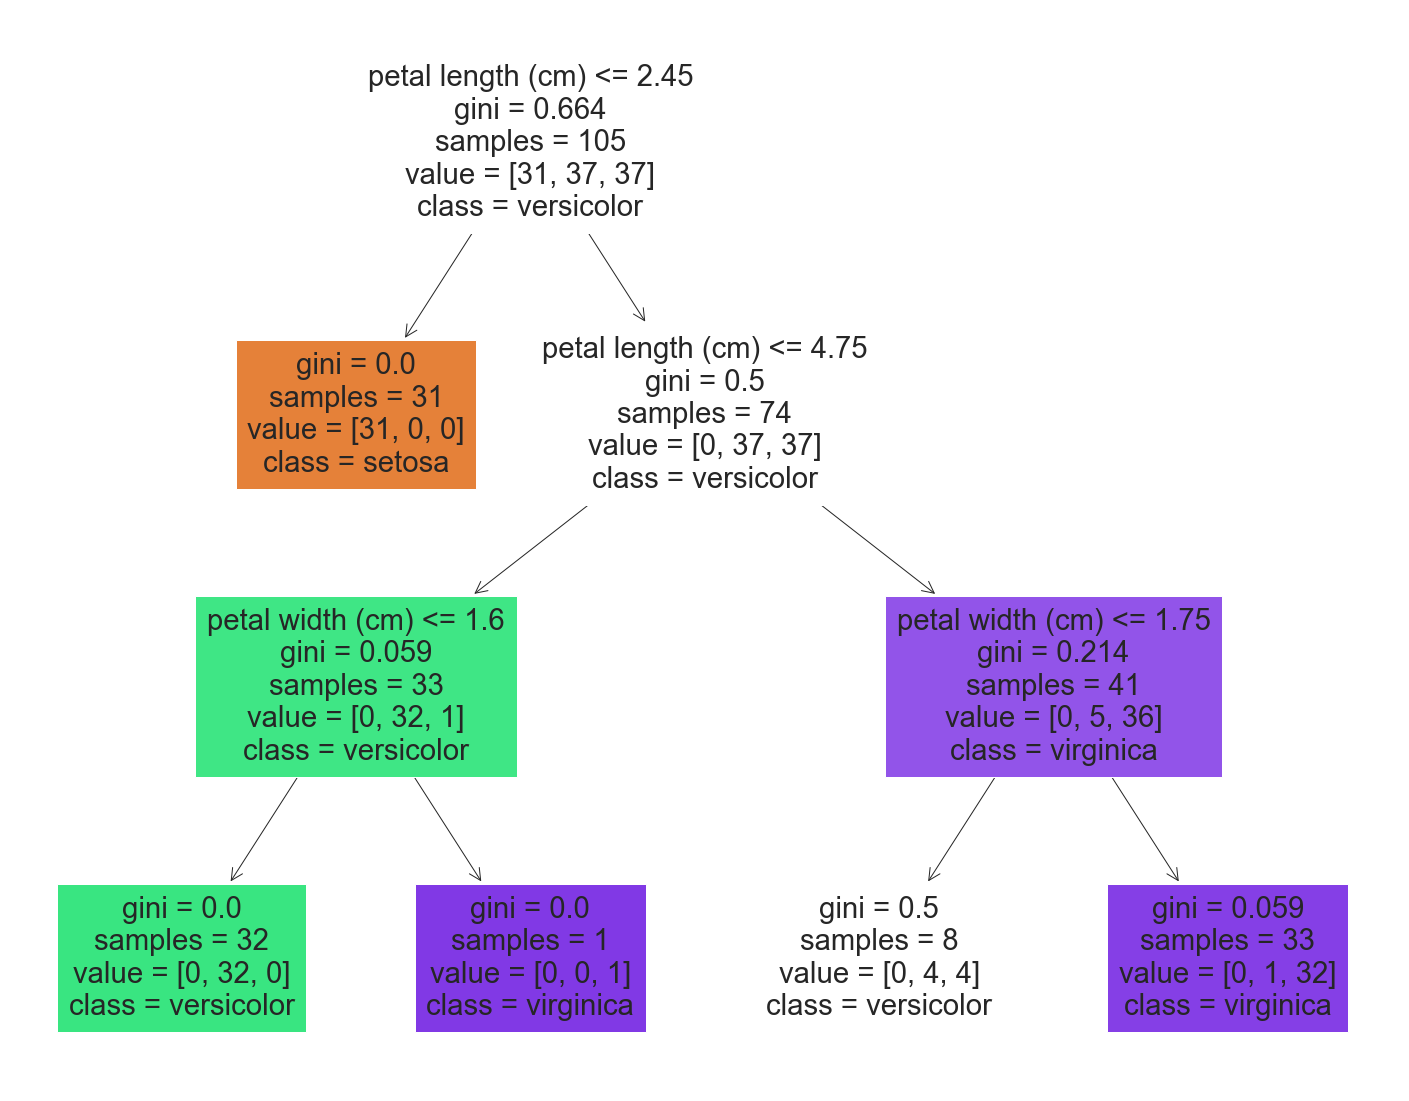

In [70]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=x.columns,  
                   class_names=labels,
                   filled=True)